In [17]:
import pandas as pd
import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectFromModel


In [2]:
import pandas as pd
import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
# plt.style.use('seaborn-colorblind')
# %matplotlib inline
from sklearn.feature_selection import RFE
#from sklearn.feature_selection import hybrid

In [3]:
import pandas as pd
import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

import category_encoders as ce

In [62]:
delirium_dataset=pd.read_csv('/content/delirium_mimic_dataset_missing_imputed.csv')
delirium_dataset.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
delirium_dataset_encoded = pd.get_dummies(delirium_dataset,drop_first=True)

In [6]:
delirium_dataset_encoded.columns

Index(['AGE', 'ALT', 'ART BP Systolic', 'ART BP mean', 'ART Lumen Volume',
       'AST', 'Admission Weight (Kg)', 'Albumin', 'Alkaline Phosphate',
       'Ammonia',
       ...
       'RELIGION_HINDU', 'RELIGION_JEHOVAH'S WITNESS', 'RELIGION_JEWISH',
       'RELIGION_MUSLIM', 'RELIGION_NOT SPECIFIED', 'RELIGION_OTHER',
       'RELIGION_PROTESTANT QUAKER', 'RELIGION_ROMANIAN EAST. ORTH',
       'RELIGION_UNITARIAN-UNIVERSALIST', 'RELIGION_UNOBTAINABLE'],
      dtype='object', length=157)

In [9]:
delirium_dataset_encoded.shape

(8646, 157)

In [8]:
delirium_dataset_encoded.to_csv("delirium_dataset_encoded.csv")

In [5]:
delirium_dataset_encoded2=delirium_dataset_encoded.copy()

In [ ]:
list(delirium_dataset_encoded2)

In [6]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler().fit(delirium_dataset_encoded)
X_train_copy = delirium_dataset_encoded.copy(deep=True)
X_train_copy = mms.transform(delirium_dataset_encoded2)
X_train_copy

array([[0.39204349, 0.78842347, 0.06863552, ..., 0.        , 0.        ,
        0.        ],
       [0.40714202, 0.78861565, 0.0701923 , ..., 0.        , 0.        ,
        0.        ],
       [0.39359442, 0.78858091, 0.06378386, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.3639504 , 0.79474853, 0.0683293 , ..., 0.        , 0.        ,
        0.        ],
       [0.34426382, 0.79243819, 0.06746426, ..., 0.        , 0.        ,
        0.        ],
       [0.34785279, 0.79418629, 0.07168317, ..., 0.        , 0.        ,
        0.        ]])

In [7]:
df=pd.DataFrame(X_train_copy, columns =list(delirium_dataset_encoded2))

In [22]:
df.to_csv("delirium_dataset_encoded_and_scaled.csv")

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=['Delirium'], axis=1), 
                                                    df.Delirium, test_size=0.2,
                                                    random_state=0)
X_train.shape, X_test.shape

((6916, 156), (1730, 156))

In [9]:
#  n_features_to_select decide the stopping criterion
# we stop till 10 features remaining

sel_ = RFE(RandomForestClassifier(n_estimators=20), n_features_to_select=10)
sel_.fit(X_train.fillna(0), y_train)

RFE(estimator=RandomForestClassifier(n_estimators=20), n_features_to_select=10)

In [10]:
selected_feat = X_train.columns[(sel_.get_support())]
print(selected_feat)

Index(['AGE', 'ART BP mean', 'AST', 'Arterial Base Excess', 'BUN',
       'Differential-Neuts', 'Inspired O2 Fraction', 'LOS',
       'Non Invasive Blood Pressure mean', 'Venous CO2 Pressure'],
      dtype='object')


In [18]:
scaler = RobustScaler()
scaler.fit(X_train)

RobustScaler()

In [20]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l2'))
sel_.fit(scaler.transform(X_train), y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


SelectFromModel(estimator=LogisticRegression(C=1))

In [21]:
# make a list with the selected features
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 156
selected features: 50
features with coefficients shrank to zero: 3


In [24]:
selected_feat

Index(['ALT', 'ART BP Systolic', 'Admission Weight (Kg)', 'Albumin',
       'Anion gap', 'GENDER', 'HCO3 (serum)', 'Inspired O2 Fraction',
       'Lactic Acid', 'Magnesium', 'Total Bilirubin', 'WBC',
       'DISCHARGE_LOCATION_DISCH-TRAN TO PSYCH HOSP',
       'DISCHARGE_LOCATION_HOME', 'DISCHARGE_LOCATION_HOME HEALTH CARE',
       'DISCHARGE_LOCATION_LEFT AGAINST MEDICAL ADVI',
       'DISCHARGE_LOCATION_LONG TERM CARE HOSPITAL',
       'DISCHARGE_LOCATION_OTHER FACILITY',
       'DISCHARGE_LOCATION_REHAB/DISTINCT PART HOSP',
       'DISCHARGE_LOCATION_SHORT TERM HOSPITAL', 'DISCHARGE_LOCATION_SNF',
       'ETHNICITY_ASIAN', 'ETHNICITY_BLACK', 'ETHNICITY_HISPANIC',
       'ETHNICITY_OTHER', 'ETHNICITY_PORTUGUESE',
       'ETHNICITY_UNKNOWN/NOT SPECIFIED', 'INSURANCE_Medicaid',
       'INSURANCE_Private', 'LANGUAGE_*YID', 'LANGUAGE_CANT', 'LANGUAGE_ENGL',
       'LANGUAGE_HAIT', 'LANGUAGE_PERS', 'LANGUAGE_PORT', 'LANGUAGE_PTUN',
       'MARITAL_STATUS_MARRIED', 'MARITAL_STATUS_SEPARATE

In [22]:
# we can identify the removed features like this:
removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index(['LANGUAGE_*BEN', 'LANGUAGE_*FUL', 'LANGUAGE_*TOY'], dtype='object')

In [23]:
# remove the features from the training and testing set

X_train_selected = sel_.transform(X_train.fillna(0))
X_test_selected = sel_.transform(X_test.fillna(0))

X_train_selected.shape, X_test_selected.shape

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


((6916, 50), (1730, 50))

In [26]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

In [31]:
rf = RandomForestClassifier(n_estimators = 100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]


In [38]:
len(indices)

156

In [166]:
l=[]
for i in indices:
  l.append(''+list(df)[i])
  print(list(df)[i])

Impaired Skin Width #1
LDL measured
LOS
Kphos
Protonix
Ventilator Tank #1
Temperature Celsius
Non-Invasive Blood Pressure mean
Admission Weight (Kg)
Magnesium
AGE
Lipase
Sodium (serum)
AST
Total Bilirubin
Impaired Skin Length #1
ALT
Impaired Skin Depth #1
Pulmonary Artery Pressure mean
Chest Tubes Other
CK-MB
BUN
HCO3 (serum)
Alkaline Phosphate
Brain Natiuretic Peptide (BNP)
CK (CPK)
Differential-Monos
ART BP Systolic
C Reactive Protein (CRP)
Arterial Base Excess
Venous O2 Pressure
MDI #1 Puff
ART BP mean
Inspired O2 Fraction
LDH
Calcium non-ionized
Anion gap
CO (Arterial)
Filter Pressure
ART Lumen Volume
GENDER
Delirium
Differential-Basos
Lactic Acid
Heart Rate
Fentanyl
Albumin
Respiratory Rate
Potassium (whole blood)
Differential-Eos
Arterial Blood Pressure mean
Fibrinogen
Non Invasive Blood Pressure mean
O2 saturation pulseoxymetry
Insulin
Arterial CO2 Pressure
Arterial O2 Saturation
Differential-Neuts
Ammonia
Differential-Lymphs
Differential-Bands
KCL
Dialysate Rate
Ionized Calcium

In [191]:
cols=l[0:70]

In [192]:
data=delirium_dataset_encoded[cols]

In [193]:
cols

['Impaired Skin Width #1',
 'LDL measured',
 'LOS',
 'Kphos',
 'Protonix',
 'Ventilator Tank #1',
 'Temperature Celsius',
 'Non-Invasive Blood Pressure mean',
 'Admission Weight (Kg)',
 'Magnesium',
 'AGE',
 'Lipase',
 'Sodium (serum)',
 'AST',
 'Total Bilirubin',
 'Impaired Skin Length #1',
 'ALT',
 'Impaired Skin Depth #1',
 'Pulmonary Artery Pressure mean',
 'Chest Tubes Other',
 'CK-MB',
 'BUN',
 'HCO3 (serum)',
 'Alkaline Phosphate',
 'Brain Natiuretic Peptide (BNP)',
 'CK (CPK)',
 'Differential-Monos',
 'ART BP Systolic',
 'C Reactive Protein (CRP)',
 'Arterial Base Excess',
 'Venous O2 Pressure',
 'MDI #1 Puff',
 'ART BP mean',
 'Inspired O2 Fraction',
 'LDH',
 'Calcium non-ionized',
 'Anion gap',
 'CO (Arterial)',
 'Filter Pressure',
 'ART Lumen Volume',
 'GENDER',
 'Delirium',
 'Differential-Basos',
 'Lactic Acid',
 'Heart Rate',
 'Fentanyl',
 'Albumin',
 'Respiratory Rate',
 'Potassium (whole blood)',
 'Differential-Eos',
 'Arterial Blood Pressure mean',
 'Fibrinogen',
 'Non 

#Benchmark

In [194]:
y = data["Delirium"].values
X=data.drop(["Delirium"], axis=1)
from sklearn.model_selection import train_test_split
Xtr, Xtst, ytr, ytst = train_test_split(
    X, y, test_size=0.2, random_state=0)

## CATBOOST

In [195]:
def find_cate(df):
  cols=df.columns
  cat_features=[]
  i=0
  for col in cols:
      if len(np.unique(df[col]))<=2 and col!='Delirium':
          cat_features.append(col)
          i=i+1
  print(i)
  return cat_features

In [196]:
categorical_vars=find_cate(data)

4


In [197]:
print(categorical_vars)

['INSURANCE_Medicare', 'ETHNICITY_WHITE', 'DISCHARGE_LOCATION_DISCH-TRAN TO PSYCH HOSP', 'MARITAL_STATUS_LIFE PARTNER']


In [ ]:
!pip install catboost -U

In [103]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier

In [ ]:
delirium_dataset.info()

In [41]:
parameters = {'depth': [6,8,10],
              'learning_rate': [0.01, 0.05, 0.1],
              'iterations': [30, 50, 100]
              }


In [198]:
model_CBR = CatBoostClassifier()
grid = GridSearchCV(estimator=model_CBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(Xtr, ytr)

0:	learn: 0.6107952	total: 83.4ms	remaining: 8.26s
1:	learn: 0.5461013	total: 141ms	remaining: 6.91s
2:	learn: 0.4974150	total: 200ms	remaining: 6.47s
3:	learn: 0.4580517	total: 265ms	remaining: 6.37s
4:	learn: 0.4275834	total: 342ms	remaining: 6.49s
5:	learn: 0.4013077	total: 407ms	remaining: 6.38s
6:	learn: 0.3831095	total: 474ms	remaining: 6.29s
7:	learn: 0.3662815	total: 536ms	remaining: 6.16s
8:	learn: 0.3515326	total: 598ms	remaining: 6.05s
9:	learn: 0.3409032	total: 664ms	remaining: 5.97s
10:	learn: 0.3300426	total: 724ms	remaining: 5.85s
11:	learn: 0.3219669	total: 784ms	remaining: 5.75s
12:	learn: 0.3142753	total: 845ms	remaining: 5.65s
13:	learn: 0.3084296	total: 905ms	remaining: 5.56s
14:	learn: 0.3020609	total: 971ms	remaining: 5.5s
15:	learn: 0.2971927	total: 1.03s	remaining: 5.41s
16:	learn: 0.2928046	total: 1.09s	remaining: 5.35s
17:	learn: 0.2896461	total: 1.16s	remaining: 5.27s
18:	learn: 0.2862830	total: 1.22s	remaining: 5.19s
19:	learn: 0.2816878	total: 1.29s	remaini

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f3f3dd5b3d0>,
             n_jobs=-1,
             param_grid={'depth': [6, 8, 10], 'iterations': [30, 50, 100],
                         'learning_rate': [0.01, 0.05, 0.1]})

In [199]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
print("\n The best score across ALL searched params:\n", grid.best_score_)
print("\n The best parameters across ALL searched params:\n", grid.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.8925679583574321

 The best parameters across ALL searched params:
 {'depth': 8, 'iterations': 100, 'learning_rate': 0.1}


In [200]:
# Initializing a CatBoostClassifier with best parameters
best_params = grid.best_params_


catb = CatBoostClassifier(**best_params,
                          loss_function='Logloss',
                          eval_metric = 'Accuracy',
                          nan_mode='Min',
                          thread_count=2,
                          verbose = False)

In [201]:
from sklearn.model_selection import StratifiedKFold

# Metrics
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import make_scorer

In [202]:
SEED = 42
FOLDS = 5

skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=SEED)

In [203]:
import numpy as np
from catboost import Pool

In [204]:
roc_auc = list()
average_precision = list()
oof = np.zeros(len(Xtr))
best_iteration = list()

for train_idx, test_idx in skf.split(Xtr, ytr):
    X_train, y_train = Xtr.iloc[train_idx, :], ytr[train_idx]
    X_test, y_test = Xtr.iloc[test_idx, :], ytr[test_idx]
    
    train = Pool(data=X_train, 
             label=y_train,            
             feature_names=list(X_train.columns),
             cat_features=categorical_vars)

    test = Pool(data=X_test, 
                label=y_test,
                feature_names=list(X_test.columns),
                cat_features=categorical_vars)

    catb.fit(train,
             verbose_eval=100, 
             early_stopping_rounds=50,
             eval_set=test,
             use_best_model=True,
             #task_type = "GPU",
             plot=False)
    
    best_iteration.append(catb.best_iteration_)
    preds = catb.predict_proba(X_test)
    
    oof[test_idx] = preds[:,1]
    
    roc_auc.append(roc_auc_score(y_true=y_test, y_score=preds[:,1]))
    average_precision.append(average_precision_score(y_true=y_test, y_score=preds[:,1]))

0:	learn: 0.8929863	test: 0.8908960	best: 0.8908960 (0)	total: 78.2ms	remaining: 7.74s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8916184971
bestIteration = 1

Shrink model to first 2 iterations.
0:	learn: 0.8924634	test: 0.8915401	best: 0.8915401 (0)	total: 101ms	remaining: 9.95s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8929862617
bestIteration = 35

Shrink model to first 36 iterations.
0:	learn: 0.8921019	test: 0.8922632	best: 0.8922632 (0)	total: 79.3ms	remaining: 7.85s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.892263196
bestIteration = 0

Shrink model to first 1 iterations.
0:	learn: 0.8926441	test: 0.8908171	best: 0.8908171 (0)	total: 80.4ms	remaining: 7.96s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.892263196
bestIteration = 1

Shrink model to first 2 iterations.
0:	learn: 0.8922827	test: 0.8922632	best: 0.8922632 (0)	total: 80.7ms	remaining: 7.99s
Stopped by overfitting detecto

In [205]:
print("Average cv roc auc score %0.3f ± %0.3f" % (np.mean(roc_auc), np.std(roc_auc)))
print("Average cv roc average precision %0.3f ± %0.3f" % (np.mean(average_precision), np.std(average_precision)))

print("Roc auc score OOF %0.3f" % roc_auc_score(y_true=ytr, y_score=oof))
print("Average precision OOF %0.3f" % average_precision_score(y_true=ytr, y_score=oof))

Average cv roc auc score 0.567 ± 0.037
Average cv roc average precision 0.132 ± 0.019
Roc auc score OOF 0.525
Average precision OOF 0.113


In [206]:
prd=catb.predict(Xtst)

In [111]:
print("Average cv roc auc score %0.3f ± %0.3f" % (np.mean(roc_auc), np.std(roc_auc)))
print("Average cv roc average precision %0.3f ± %0.3f" % (np.mean(average_precision), np.std(average_precision)))

print("Roc auc score OOF %0.3f" % roc_auc_score(y_true=ytr, y_score=oof))
print("Average precision OOF %0.3f" % average_precision_score(y_true=ytr, y_score=oof))

Average cv roc auc score 0.646 ± 0.063
Average cv roc average precision 0.215 ± 0.070
Roc auc score OOF 0.580
Average precision OOF 0.141


In [112]:
prd=catb.predict(Xtst)

In [113]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
print(classification_report(ytst, prd))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1536
           1       0.00      0.00      0.00       194

    accuracy                           0.89      1730
   macro avg       0.44      0.50      0.47      1730
weighted avg       0.79      0.89      0.84      1730



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
print("Average cv roc auc score %0.3f ± %0.3f" % (np.mean(roc_auc), np.std(roc_auc)))
print("Average cv roc average precision %0.3f ± %0.3f" % (np.mean(average_precision), np.std(average_precision)))

print("Roc auc score OOF %0.3f" % roc_auc_score(y_true=ytr, y_score=oof))
print("Average precision OOF %0.3f" % average_precision_score(y_true=ytr, y_score=oof))

Average cv roc auc score 0.564 ± 0.051
Average cv roc average precision 0.142 ± 0.039
Roc auc score OOF 0.526
Average precision OOF 0.120


In [58]:
prd=catb.predict(Xtst)

In [59]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
print(classification_report(ytst, prd))

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      1536
         1.0       0.00      0.00      0.00       194

    accuracy                           0.89      1730
   macro avg       0.44      0.50      0.47      1730
weighted avg       0.79      0.89      0.84      1730



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## XGBOOST

In [207]:
import pandas as pd # load and manipulate data and for One-Hot Encoding
import numpy as np # calculate the mean and standard deviation
import xgboost as xgb # XGBoost stuff
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.model_selection import GridSearchCV # cross validation
from sklearn.metrics import confusion_matrix # creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix

In [215]:
y = data["Delirium"].values
X=data.drop(["Delirium"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf_xgb = xgb.XGBClassifier(objective='binary:logistic',
                            eval_metric="logloss", ## this avoids a warning...
                            seed=42, 
                            use_label_encoder=False)

In [219]:
len(X_test)

2162

In [216]:
clf_xgb.fit(X_train, y_train)

XGBClassifier(eval_metric='logloss', seed=42, use_label_encoder=False)

In [217]:
prd=clf_xgb.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


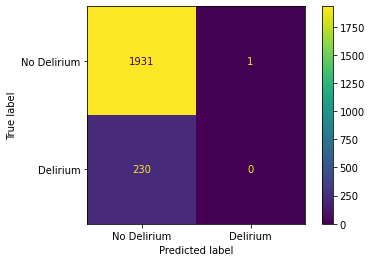

In [218]:
plot_confusion_matrix(clf_xgb, X_test, y_test, display_labels=["No Delirium", "Delirium"])

In [212]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
print(classification_report(y_test, prd))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1932
           1       0.00      0.00      0.00       230

    accuracy                           0.89      2162
   macro avg       0.45      0.50      0.47      2162
weighted avg       0.80      0.89      0.84      2162



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


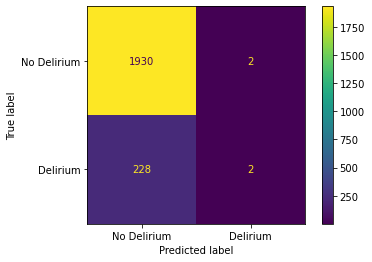

In [118]:
plot_confusion_matrix(clf_xgb, X_test, y_test, display_labels=["No Delirium", "Delirium"])

In [119]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
print(classification_report(y_test, prd))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1932
           1       0.50      0.01      0.02       230

    accuracy                           0.89      2162
   macro avg       0.70      0.50      0.48      2162
weighted avg       0.85      0.89      0.85      2162



## Logistic Regression

In [134]:
y = delirium_dataset_encoded["Delirium"].values
X=delirium_dataset_encoded.drop(["Delirium"], axis=1)

In [135]:

from sklearn.model_selection import train_test_split
Xtr, Xtst, ytr, ytst = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [136]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

def fit_scaler(train_df, features_list: list, scale_type: str):
    """
    Fit scaler on train data
    note: scalers takes input (num_samples, num_features) and scales all features in features_list

    Inputs:
    - train_df: dataframe of x train data
    - features_list: list of features to be scaled
    - scale_type: type of scale to use (ie. standardize, normalize)

    Outputs: 
    scaler: scaler of interest, fitted on train data containing features from features_list
    """

    scaler_dict = {
        "standard" : StandardScaler(), 
        "minmax" : MinMaxScaler(feature_range=(0, 1)) , 
        "maxabs" : MaxAbsScaler(), 
        "robust": RobustScaler(quantile_range=(25, 75)),
        "power_yeo_johnson": PowerTransformer(method='yeo-johnson'),
        "power_box_cox" : PowerTransformer(method='box-cox'),
        "quartile_normal":  QuantileTransformer(output_distribution='normal'),
        "quartile_uniform": QuantileTransformer(output_distribution='uniform'),
        "normalizer": Normalizer()
    }
    
    scaler = scaler_dict[scale_type].fit(train_df[features_list])

    return scaler

In [137]:
def getBinaryFeatures(df):
  binary_cols= [col for col in df.columns if len(df[col].unique())==2]
  return binary_cols
binary_features=getBinaryFeatures(delirium_dataset)
nonbinary_features = [feature for feature in X.columns if feature not in binary_features]
print("Non binary features that are standardized: " + str(nonbinary_features))

# Fit the standardized scaler on the TRAIN data
scaler = fit_scaler(Xtr, nonbinary_features, "standard")

# Tranform both TRAIN and TEST data on the scaler fitted on TRAIN data
Xtr[nonbinary_features] = scaler.transform(Xtr[nonbinary_features])
Xtst[nonbinary_features] = scaler.transform(Xtst[nonbinary_features])

Non binary features that are standardized: ['AGE', 'ALT', 'ART BP Systolic', 'ART BP mean', 'ART Lumen Volume', 'AST', 'Admission Weight (Kg)', 'Albumin', 'Alkaline Phosphate', 'Ammonia', 'Anion gap', 'Arterial Base Excess', 'Arterial Blood Pressure mean', 'Arterial CO2 Pressure', 'Arterial O2 Saturation', 'BUN', 'Brain Natiuretic Peptide (BNP)', 'C Reactive Protein (CRP)', 'CK (CPK)', 'CK-MB', 'CO (Arterial)', 'Calcium non-ionized', 'Chest Tubes Other', 'Dialysate Rate', 'Differential-Atyps', 'Differential-Bands', 'Differential-Basos', 'Differential-Eos', 'Differential-Lymphs', 'Differential-Monos', 'Differential-Neuts', 'Fentanyl', 'Fibrinogen', 'Filter Pressure', 'Free Water', 'GENDER', 'HCO3 (serum)', 'Heart Rate', 'Impaired Skin Depth #1', 'Impaired Skin Length #1', 'Impaired Skin Width #1', 'Inspired O2 Fraction', 'Insulin', 'Ionized Calcium', 'KCL', 'Kphos', 'LDH', 'LDL measured', 'LOS', 'Lactic Acid', 'Lipase', 'MDI #1 Puff', 'Magnesium', 'Non Invasive Blood Pressure mean', 'No

In [123]:
def remove_highly_correlated_features(df: pd.DataFrame, features_list:list, non_features_list: list, threshold=0.95):
    """
    Remove features that are more correlated than 0.95
    - Remaining features should not be correlated by more than 0.95 with each other
    """

    corr_matrix = df.corr().abs()
    # Select upper triangle of correlation matrix
        # np.triu = upper triangle of matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find index of feature columns with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
    to_keep = [f for f in features_list if f not in to_drop]

    print("Dropped features = " , to_drop)
    return df[non_features_list + to_keep], np.asarray(to_keep)

In [138]:
X = delirium_dataset_encoded.drop("Delirium", axis=1).copy()

In [139]:
features_list=X.columns

In [140]:
Xtr, features_list = remove_highly_correlated_features(Xtr, features_list, [])
Xtst = Xtst[[] + list(features_list)]

Dropped features =  []


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


In [141]:
def format_data(df: pd.DataFrame, features_list: list, label_col="mort_icu"):
    """
    Format data for logistic regression

    Inputs:
    - df: dataframe of data
    - features_list: features of interest
    - idxs: indexes that match label

    Outputs:
    - data: np array of data (num_datapoints, num_features)
    - label: label corresponding to data
    """
    num_data = len(df)
    num_features = len(features_list)
    data = df[features_list].values.reshape(num_data, num_features)
    label = df[label_col].values.reshape(num_data,)

    return data, label

In [132]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

def rfe_linear(model, features_list:np.array, X_train: np.array, y_train: np.array, fold=10):
    """
    Report list of optimal features given model

    Inputs:
    - model: model of interest
        - note: can only work with estimators that give information about feature importance through either "coef_" or "feature_importances_" attribute
    - features_list: features of interest
    X_train: np array of train data
    y_train: np array of train labels
    """
    num_features = len(features_list)

    # step = number of features to be removed at each step
    rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(fold), scoring='accuracy')
    rfecv.fit(X_train, y_train)

    print("Optimal number of features : %d" % rfecv.n_features_)
    return features_list[rfecv.support_]

In [ ]:
from sklearn.linear_model import LogisticRegression

# Feature selection assuming linear SVM 
# RFE linear, wrapper based feature selection
features_selected = rfe_linear(LogisticRegression(), features_list, Xtr, ytr)
X_train_selected = Xtr[features_selected].values.reshape(len(Xtr), len(features_selected))
X_test_selected = Xtst[features_selected].values.reshape(len(Xtst), len(features_selected))

print("Optimal linear model features: " + str(features_selected))
print("X train = " + str(X_train_selected.shape))
print("X test = " + str(X_test_selected.shape))

In [143]:
features_selected

array(['ALT', 'ART BP Systolic', 'Ammonia', 'Anion gap', 'CO (Arterial)',
       'HCO3 (serum)', 'Inspired O2 Fraction', 'Kphos', 'LOS',
       'Magnesium', 'O2 saturation pulseoxymetry',
       'Pulmonary Artery Pressure mean', 'Total Bilirubin',
       'Venous CO2 Pressure', 'WBC',
       'DISCHARGE_LOCATION_HOME HEALTH CARE',
       'DISCHARGE_LOCATION_LONG TERM CARE HOSPITAL',
       'DISCHARGE_LOCATION_REHAB/DISTINCT PART HOSP',
       'DISCHARGE_LOCATION_SNF', 'ETHNICITY_ASIAN', 'ETHNICITY_BLACK',
       'ETHNICITY_CARIBBEAN ISLAND', 'ETHNICITY_HISPANIC',
       'ETHNICITY_MIDDLE EASTERN',
       'ETHNICITY_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER',
       'ETHNICITY_UNKNOWN/NOT SPECIFIED', 'ETHNICITY_WHITE',
       'INSURANCE_Medicaid', 'INSURANCE_Private', 'LANGUAGE_*FAR',
       'LANGUAGE_*YID', 'LANGUAGE_GREE', 'LANGUAGE_HAIT', 'LANGUAGE_PERS',
       'LANGUAGE_POLI', 'LANGUAGE_PORT', 'LANGUAGE_PTUN', 'LANGUAGE_VIET',
       'MARITAL_STATUS_UNKNOWN (DEFAULT)', 'RELIGION_HIND

In [144]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

def report_best_params(X_train: np.array, y_train: np.array, params: dict, model, n_splits: int):
    """
    x_train: np array of train data
    y_train: np array of train data labels
    params: range of parameters to test
    estimator: type of model
    n_splits: number of splits for cv validation

    - gamma: try from 0.01 to 10000000000, then narrow down
    """

    search = RandomizedSearchCV(
        estimator=model, 
        param_distributions=params, 
        verbose = 20,
        n_iter = 5,
        cv= StratifiedKFold(n_splits=n_splits))

    search.fit(X_train, y_train)
    
    print('Best score obtained: {0}'.format(search.best_score_))
    print('Parameters:')
    for param, value in search.best_params_.items():
        print('\t{}: {}'.format(param, value))

In [145]:
# Parameter tuning for Logistic Regression (using all features)
params = [{'C': np.logspace(0, 4, num=10), 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}]
report_best_params(X_train, y_train, params, LogisticRegression(), 5)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5; 1/5] START C=10000.0, penalty=l2, solver=liblinear.....................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5; 1/5] END C=10000.0, penalty=l2, solver=liblinear;, score=0.889 total time=   1.7s
[CV 2/5; 1/5] START C=10000.0, penalty=l2, solver=liblinear.....................
[CV 2/5; 1/5] END C=10000.0, penalty=l2, solver=liblinear;, score=0.891 total time=   1.5s
[CV 3/5; 1/5] START C=10000.0, penalty=l2, solver=liblinear.....................
[CV 3/5; 1/5] END C=10000.0, penalty=l2, solver=liblinear;, score=0.890 total time=   1.7s
[CV 4/5; 1/5] START C=10000.0, penalty=l2, solver=liblinear.....................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5; 1/5] END C=10000.0, penalty=l2, solver=liblinear;, score=0.888 total time=   1.5s
[CV 5/5; 1/5] START C=10000.0, penalty=l2, solver=liblinear.....................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 1/5] END C=10000.0, penalty=l2, solver=liblinear;, score=0.887 total time=   1.8s
[CV 1/5; 2/5] START C=7.742636826811269, penalty=l1, solver=liblinear...........
[CV 1/5; 2/5] END C=7.742636826811269, penalty=l1, solver=liblinear;, score=0.885 total time=   0.8s
[CV 2/5; 2/5] START C=7.742636826811269, penalty=l1, solver=liblinear...........
[CV 2/5; 2/5] END C=7.742636826811269, penalty=l1, solver=liblinear;, score=0.891 total time=   2.4s
[CV 3/5; 2/5] START C=7.742636826811269, penalty=l1, solver=liblinear...........
[CV 3/5; 2/5] END C=7.742636826811269, penalty=l1, solver=liblinear;, score=0.893 total time=   0.9s
[CV 4/5; 2/5] START C=7.742636826811269, penalty=l1, solver=liblinear...........
[CV 4/5; 2/5] END C=7.742636826811269, penalty=l1, solver=liblinear;, score=0.891 total time=   1.0s
[CV 5/5; 2/5] START C=7.742636826811269, penalty=l1, solver=liblinear...........
[CV 5/5; 2/5] END C=7.742636826811269, penalty=l1, solver=liblinear;, score=0.883 total time=   1.7s

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5; 3/5] END C=10000.0, penalty=l1, solver=saga;, score=0.891 total time=   1.6s
[CV 2/5; 3/5] START C=10000.0, penalty=l1, solver=saga..........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5; 3/5] END C=10000.0, penalty=l1, solver=saga;, score=0.891 total time=   1.7s
[CV 3/5; 3/5] START C=10000.0, penalty=l1, solver=saga..........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5; 3/5] END C=10000.0, penalty=l1, solver=saga;, score=0.891 total time=   1.7s
[CV 4/5; 3/5] START C=10000.0, penalty=l1, solver=saga..........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5; 3/5] END C=10000.0, penalty=l1, solver=saga;, score=0.891 total time=   1.7s
[CV 5/5; 3/5] START C=10000.0, penalty=l1, solver=saga..........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5; 3/5] END C=10000.0, penalty=l1, solver=saga;, score=0.890 total time=   1.7s
[CV 1/5; 4/5] START C=1.0, penalty=l2, solver=liblinear.........................
[CV 1/5; 4/5] END C=1.0, penalty=l2, solver=liblinear;, score=0.888 total time=   1.6s
[CV 2/5; 4/5] START C=1.0, penalty=l2, solver=liblinear.........................
[CV 2/5; 4/5] END C=1.0, penalty=l2, solver=liblinear;, score=0.891 total time=   1.7s
[CV 3/5; 4/5] START C=1.0, penalty=l2, solver=liblinear.........................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5; 4/5] END C=1.0, penalty=l2, solver=liblinear;, score=0.887 total time=   1.5s
[CV 4/5; 4/5] START C=1.0, penalty=l2, solver=liblinear.........................
[CV 4/5; 4/5] END C=1.0, penalty=l2, solver=liblinear;, score=0.886 total time=   1.3s
[CV 5/5; 4/5] START C=1.0, penalty=l2, solver=liblinear.........................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5; 4/5] END C=1.0, penalty=l2, solver=liblinear;, score=0.887 total time=   1.6s
[CV 1/5; 5/5] START C=59.94842503189409, penalty=l2, solver=saga................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 1/5; 5/5] END C=59.94842503189409, penalty=l2, solver=saga;, score=0.891 total time=   1.3s
[CV 2/5; 5/5] START C=59.94842503189409, penalty=l2, solver=saga................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 2/5; 5/5] END C=59.94842503189409, penalty=l2, solver=saga;, score=0.891 total time=   1.3s
[CV 3/5; 5/5] START C=59.94842503189409, penalty=l2, solver=saga................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 3/5; 5/5] END C=59.94842503189409, penalty=l2, solver=saga;, score=0.891 total time=   1.3s
[CV 4/5; 5/5] START C=59.94842503189409, penalty=l2, solver=saga................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 4/5; 5/5] END C=59.94842503189409, penalty=l2, solver=saga;, score=0.891 total time=   1.3s
[CV 5/5; 5/5] START C=59.94842503189409, penalty=l2, solver=saga................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV 5/5; 5/5] END C=59.94842503189409, penalty=l2, solver=saga;, score=0.890 total time=   1.3s
Best score obtained: 0.8904996811254844
Parameters:
	solver: saga
	penalty: l1
	C: 10000.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [146]:
# Parameter tuning for Logistic Regression (using selected features)
params = [{'C': np.logspace(0, 4, num=10), 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}]
report_best_params(X_train_selected, ytr, params, LogisticRegression(), 5)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5; 1/5] START C=1.0, penalty=l2, solver=liblinear.........................
[CV 1/5; 1/5] END C=1.0, penalty=l2, solver=liblinear;, score=0.892 total time=   0.1s
[CV 2/5; 1/5] START C=1.0, penalty=l2, solver=liblinear.........................
[CV 2/5; 1/5] END C=1.0, penalty=l2, solver=liblinear;, score=0.890 total time=   0.1s
[CV 3/5; 1/5] START C=1.0, penalty=l2, solver=liblinear.........................
[CV 3/5; 1/5] END C=1.0, penalty=l2, solver=liblinear;, score=0.896 total time=   0.1s
[CV 4/5; 1/5] START C=1.0, penalty=l2, solver=liblinear.........................
[CV 4/5; 1/5] END C=1.0, penalty=l2, solver=liblinear;, score=0.894 total time=   0.1s
[CV 5/5; 1/5] START C=1.0, penalty=l2, solver=liblinear.........................
[CV 5/5; 1/5] END C=1.0, penalty=l2, solver=liblinear;, score=0.893 total time=   0.1s
[CV 1/5; 2/5] START C=10000.0, penalty=l1, solver=liblinear.....................
[CV 1/5; 2/5] END C

In [147]:
from sklearn.linear_model import LogisticRegression

# Define logistic regression model with selected features
solver= "liblinear"
penalty= "l1"
C= 1

model1 = LogisticRegression(penalty=penalty, solver=solver, C=C)
# fit model on x_train and y_train
model1.fit(X_train_selected, ytr)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [150]:
# Define logistic regression model with all features
solver= "saga"
penalty = "l1"
C= 10000.0

model2 = LogisticRegression(penalty=penalty, solver=solver, C=C)
# fit model on x_train and y_train
model2.fit(Xtr, ytr)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(C=10000.0, penalty='l1', solver='saga')

In [151]:
def report_feature_importance(model: LogisticRegression, features_list: list):
    """
    Report best and worst features in predicting label

    Inputs:
    - model: trained model that has the coef_ attribute
    - features_list: features of intersest (ie. found in X_train and X_test)
    """
    num_features = len(features_list)
    coef = model.coef_.reshape(num_features)
    coef = abs(coef)                        # format to absolute value --> float
    coef = coef / max(coef) * 100           # relative importance
    coef = list(zip(features_list, coef))    # map features with relative importance
    coef = sorted(coef,key=lambda x: x[1], reverse = True)  # sort map by feature importance

    print("Best features")
    for feature, c in coef[0:5]:
        print("Feature: " + feature + " , relative importance: ", c)

    print("\nWorst features")
    for feature, c in coef[-5:][::-1]:
        print("Feature: " + feature + " , relative importance: " , c)

In [152]:
report_feature_importance(model1, features_selected)

Best features
Feature: Inspired O2 Fraction , relative importance:  100.0
Feature: RELIGION_MUSLIM , relative importance:  53.97325183761732
Feature: Magnesium , relative importance:  52.463745682110606
Feature: LANGUAGE_PERS , relative importance:  44.78278242372651
Feature: DISCHARGE_LOCATION_SNF , relative importance:  44.543686535640894

Worst features
Feature: LANGUAGE_POLI , relative importance:  11.369998245770063
Feature: ETHNICITY_CARIBBEAN ISLAND , relative importance:  13.338160395421127
Feature: RELIGION_HINDU , relative importance:  16.863329118505863
Feature: ETHNICITY_MIDDLE EASTERN , relative importance:  18.09966859884869
Feature: LANGUAGE_GREE , relative importance:  18.142038227272213


In [154]:
report_feature_importance(model2, list(Xtr))

Best features
Feature: INSURANCE_Medicaid , relative importance:  100.0
Feature: DISCHARGE_LOCATION_SNF , relative importance:  87.02220435527984
Feature: LANGUAGE_PERS , relative importance:  83.73093738272597
Feature: Inspired O2 Fraction , relative importance:  83.63526453301432
Feature: INSURANCE_Private , relative importance:  82.34065315201968

Worst features
Feature: LANGUAGE_*TOY , relative importance:  0.0
Feature: LANGUAGE_*FUL , relative importance:  0.0
Feature: LANGUAGE_*BEN , relative importance:  0.0
Feature: RELIGION_JEWISH , relative importance:  0.22751676233035223
Feature: Non-Invasive Blood Pressure mean , relative importance:  0.41561657145495906


In [155]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test):
    """
    Evaluate model performance

    Inputs:
    - model: trained model to evaluate
    - X_test: np array of test data
    - y_test: labels in test dataset
    """
    
    y_pred = model.decision_function(X_test)
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)

    print("AUC score: " + str(roc_auc))

    # evaluate prediction using ROC graph
    plt.title('ROC curve')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

AUC score: 0.6772645511168386


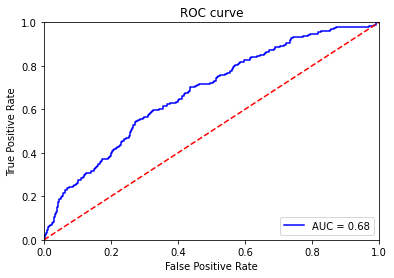

In [156]:
evaluate_model(model1, X_test_selected, ytst)

AUC score: 0.6905605670103093


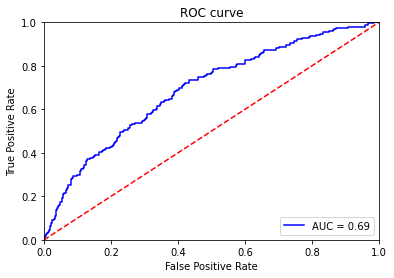

In [157]:
evaluate_model(model2, Xtst, ytst)

## Random Forest

In [160]:
y = delirium_dataset_encoded["Delirium"].values
X=delirium_dataset_encoded.drop(["Delirium"], axis=1)
from sklearn.model_selection import train_test_split
Xtr, Xtst, ytr, ytst = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [161]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

def report_best_params(x_train: np.array, y_train: np.array, params: dict, estimator, n_splits: int):
    """
    x_train: np array of train data
    y_train: np array of train data labels
    params: range of parameters to test
    estimator: type of model
    n_splits: number of splits for cv validation
    """

    grid = RandomizedSearchCV(estimator=estimator, param_distributions=params, refit = True, cv= StratifiedKFold(n_splits=n_splits))
    grid.fit(x_train, y_train)

    print("The best classifier is: ", grid.best_estimator_)

    print("The best parameters are: " + str(grid.best_params_))

In [162]:
from sklearn.ensemble import RandomForestClassifier

# Note: start with tuning n_estimators, max_depth, min_samples_split and min_samples_leaf first

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# function to measure quality of split
criterion = ["gini", "entropy"]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# minimum weighted fraction of the sum total of weights required to be at a leaf node
min_weight_fraction_leaf = [int(x) for x in np.linspace(start = 0, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']


# Create the random grid
params = {'n_estimators': n_estimators,
        'criterion': criterion,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        "max_features" : max_features}


report_best_params(Xtr, ytr, params, RandomForestClassifier(), 10)

The best classifier is:  RandomForestClassifier(max_depth=60, max_features='log2', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=400)
The best parameters are: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 60, 'criterion': 'gini'}


In [163]:
from sklearn.ensemble import RandomForestClassifier

# Note: start with tuning n_estimators, max_depth, min_samples_split and min_samples_leaf first

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# function to measure quality of split
criterion = ["gini", "entropy"]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# minimum weighted fraction of the sum total of weights required to be at a leaf node
#min_weight_fraction_leaf = [int(x) for x in np.linspace(start = 0, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']


# Create the random grid
params = {'n_estimators': n_estimators,
        'criterion': criterion,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        #'min_weight_fraction_leaf': min_weight_fraction_leaf,
        "max_features" : max_features}


report_best_params(Xtr, ytr, params, RandomForestClassifier(), 10)

The best classifier is:  RandomForestClassifier(max_depth=50, min_samples_split=5, n_estimators=1600)
The best parameters are: {'n_estimators': 1600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 50, 'criterion': 'gini'}


In [164]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestClassifier(criterion='entropy', max_depth=80, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=1000, random_state = 42)

# Train the model on training data
rf.fit(Xtr, ytr)

RandomForestClassifier(criterion='entropy', max_depth=80, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=1000, random_state=42)

AUC score: 0.5


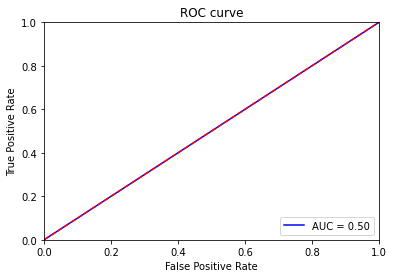

In [165]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

y_pred = rf.predict(Xtst)
fpr, tpr, threshold = metrics.roc_curve(ytst, y_pred)
roc_auc = metrics.auc(fpr, tpr)

print("AUC score: " + str(roc_auc))

# evaluate prediction using ROC graph
plt.title('ROC curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()